## **Importing Libraries**

In [2]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.metrics import *

from catboost import CatBoostClassifier

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

## **Loadind Dataset**

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv", index_col=0)
test = pd.read_csv('/kaggle/input/titanic/test.csv', index_col=0)

In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## **Data visualization**

<AxesSubplot:>

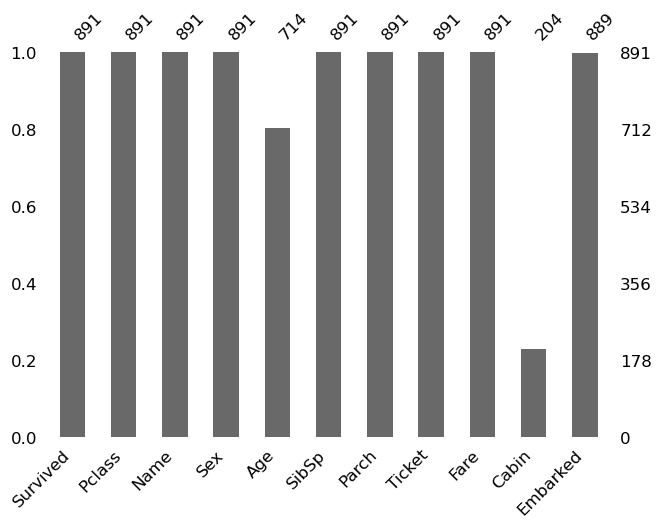

In [6]:
import matplotlib.pyplot as plt
import missingno as mso

plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(train,ax=ax_train,fontsize = 12)

<AxesSubplot:>

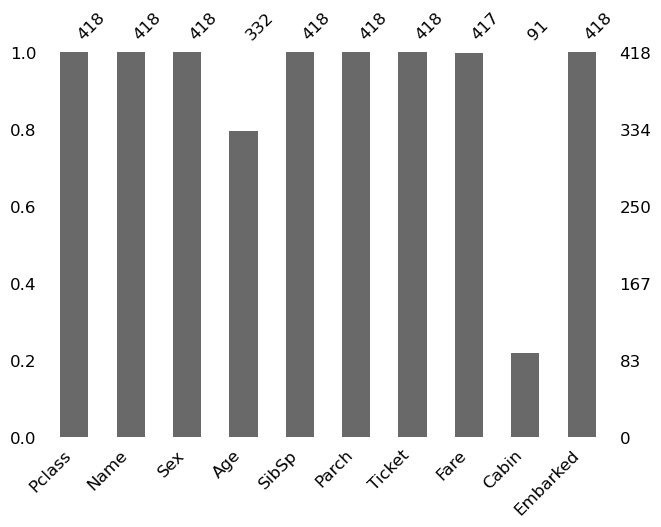

In [7]:
import matplotlib.pyplot as plt
import missingno as mso

plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(test,ax=ax_train,fontsize = 12)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


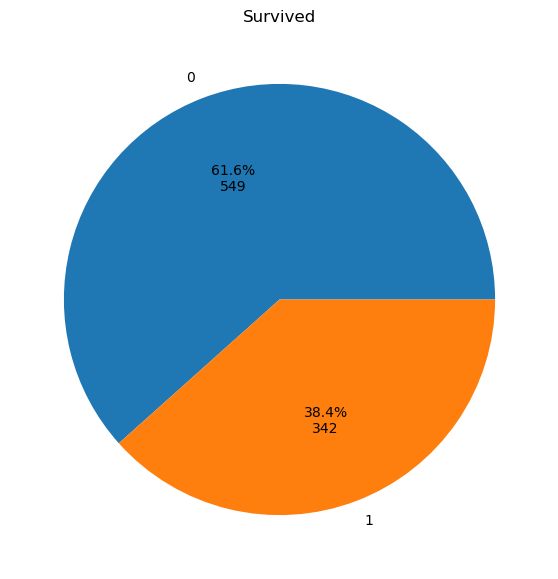

In [10]:
# Survived count
## Now we visualize the survived and non survived persons in the dataset
plt.figure(figsize=(7,7))
total = train['Survived'].value_counts().values.sum()
plt.pie(train['Survived'].value_counts().values, labels=train['Survived'].value_counts().index, autopct=lambda x: '{:.1f}%\n{:.0f}'.format(x, total*x/100))
plt.title('Survived')
plt.show()

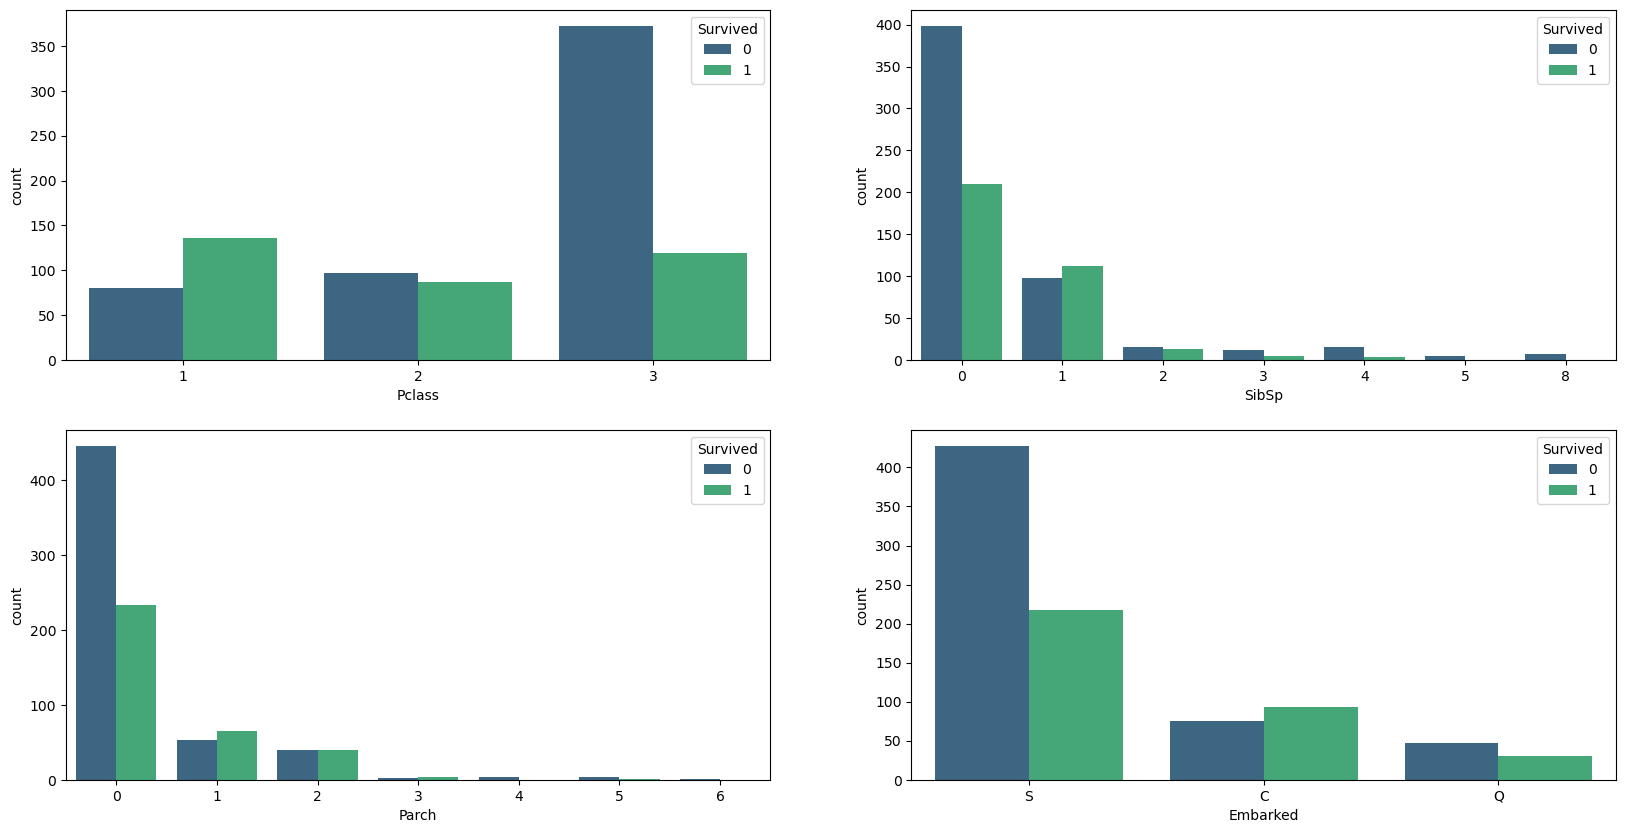

In [11]:
# 'Pclass', 'SibSp', 'Parch', 'Embarked' columns count
fig, axes = plt.subplots(2,2, figsize=(20,10))

sel_col = ['Pclass', 'SibSp', 'Parch', 'Embarked']

for i in range(2):
    for j in range(2):
        sns.countplot(x=sel_col[i*2+j], hue='Survived', palette='viridis', data=train, ax=axes[i,j])

plt.show()

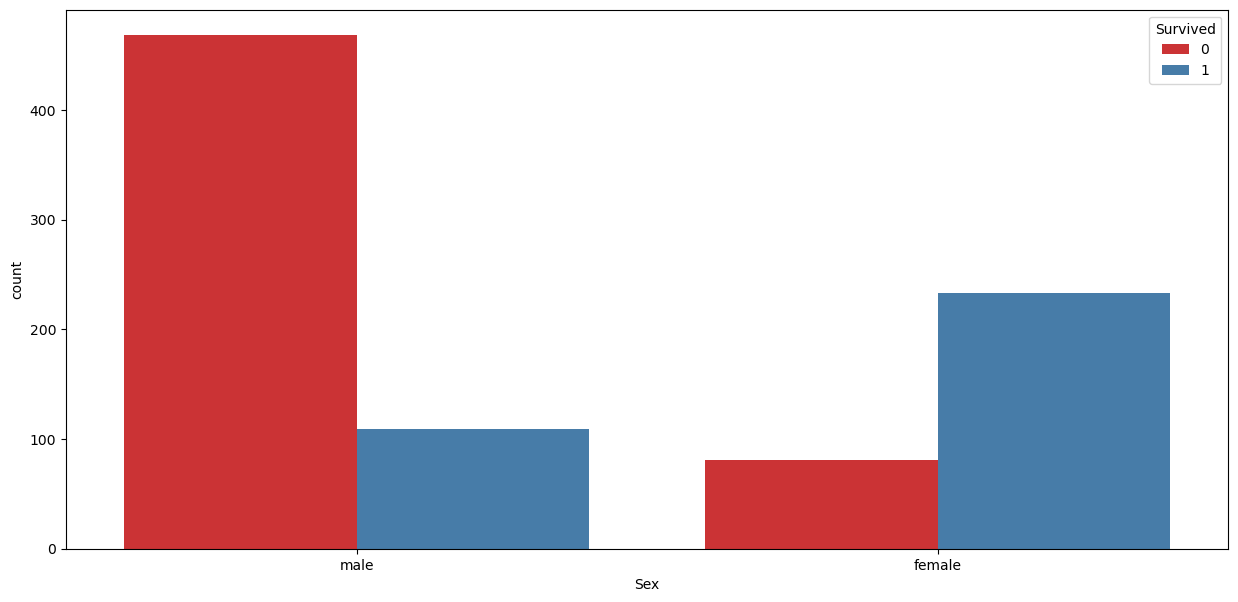

In [13]:
# Let's visualize gender count in train data
plt.figure(figsize=(15,7))
sns.countplot(data=train, x='Sex', hue='Survived', palette='Set1')
plt.show()

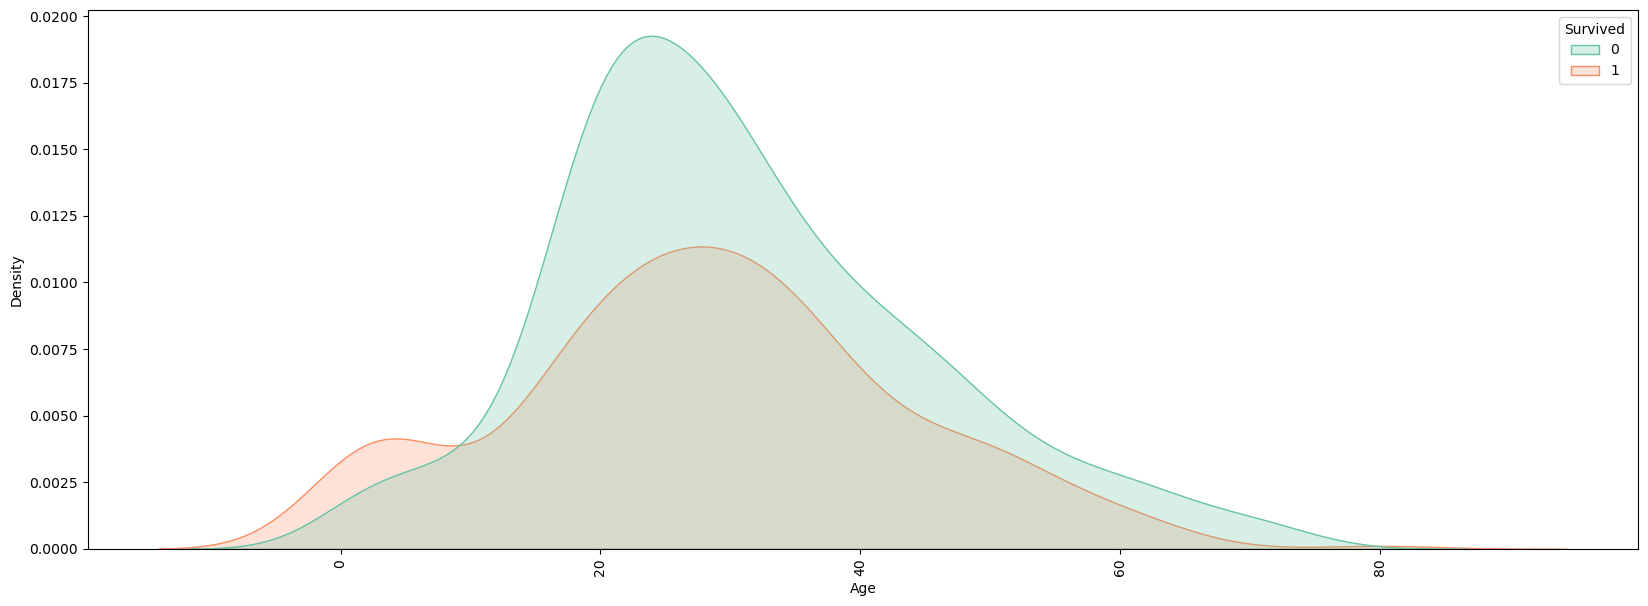

In [14]:
## Now let's visualize age distribution in order to get more information about data
plt.figure(figsize=(20,7))
sns.kdeplot(data=train, x='Age', hue='Survived',fill=True, palette='Set2')
plt.xticks(rotation=90)
plt.show()

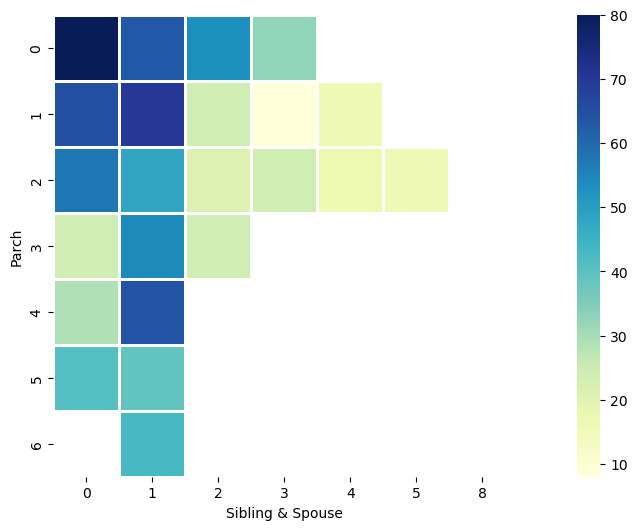

In [15]:
# heatmap
df_m = train[['Parch','SibSp','Age']].groupby(['SibSp','Parch']).max().unstack(level=0)
plt.figure(figsize=(16,6))
sns.heatmap(data=df_m, cmap="YlGnBu", linewidths=1, square=True)
plt.xticks(np.arange(7) + .5, labels=[0,1,2,3,4,5,8])
plt.xlabel('Sibling & Spouse')
plt.show()

## **Data Preproccessing**

In [16]:
# data aggregation
df = pd.concat([train.drop('Survived', axis=1),test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [17]:
# Name
df.Name = df.Name.apply(lambda x: x.split(', ')[1].split('. ')[0])
fcls = ['Dona','Jonkheer','the Countess','Capt','Don','Mme','Sir','Lady','Major','Mlle','Col','Dr']
scls = ['Rev','Mrs']
for i in df.Name.value_counts().index:
    name = '1'
    if i in fcls:
        name = '3'
    elif i in scls:
        name = '2'
    df.loc[df.Name==i, 'Name'] = name
df.Name = df.Name.astype('int64')

In [18]:
# Age
mean = df["Age"].mean()
std = df["Age"].std()
is_null = df["Age"].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["Age"] = age_slice

In [19]:
# Ticket
df.Ticket.replace({'LINE':'0'},inplace=True)
df['ticket_class'] = df.Ticket.apply(lambda x: x.split()[0] if len(x.split())>1 else 'X')
df['ticket_number'] = df.Ticket.apply(lambda x: x.split()[-1][:1]).astype('int64')


In [20]:
# Cabin
df.Cabin.fillna('X0', inplace=True)
df.Cabin = df.Cabin.apply(lambda x: x.split()[0])
df['cabin_class'] = df['Cabin'].apply(lambda x: x[:1])
df['cabin_number'] = df['Cabin'].apply(lambda x: x[1:])
df.loc[df.cabin_number=='','cabin_number'] = '0'
df.cabin_number = df.cabin_number.astype('int64')

In [21]:
# new column -> Relatives
df['relatives'] = df['SibSp'] + df['Parch']
df['relatives_count'] = df['SibSp'] + df['Parch']
df.loc[df['relatives']>0, 'travelled_alone'] = 1
df.loc[df['relatives']==0, 'travelled_alone'] = 0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           1309 non-null   int64  
 1   Name             1309 non-null   int64  
 2   Sex              1309 non-null   object 
 3   Age              1309 non-null   float64
 4   SibSp            1309 non-null   int64  
 5   Parch            1309 non-null   int64  
 6   Ticket           1309 non-null   object 
 7   Fare             1308 non-null   float64
 8   Cabin            1309 non-null   object 
 9   Embarked         1307 non-null   object 
 10  ticket_class     1309 non-null   object 
 11  ticket_number    1309 non-null   int64  
 12  cabin_class      1309 non-null   object 
 13  cabin_number     1309 non-null   int64  
 14  relatives        1309 non-null   int64  
 15  relatives_count  1309 non-null   int64  
 16  travelled_alone  1309 non-null   float64
dtypes: float64(3),

In [23]:
# encoding object values
oe = OrdinalEncoder()
object_cols = list(df.columns[df.dtypes=='object'])
df[object_cols] = oe.fit_transform(df[object_cols])


In [24]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_class,ticket_number,cabin_class,cabin_number,relatives,relatives_count,travelled_alone
PassengerId,,,,,,,,,,,,,,,,,
1,3,1,1.0,22.0,1,0,721.0,7.2500,181.0,2.0,5.0,2,8.0,0,1,1,1.0
2,1,2,0.0,38.0,1,0,816.0,71.2833,106.0,0.0,21.0,1,2.0,85,1,1,1.0
3,3,1,0.0,26.0,0,0,914.0,7.9250,181.0,2.0,42.0,3,8.0,0,0,0,0.0
4,1,2,0.0,35.0,1,0,66.0,53.1000,70.0,2.0,49.0,1,2.0,123,1,1,1.0
5,3,1,1.0,35.0,0,0,650.0,8.0500,181.0,2.0,49.0,3,8.0,0,0,0,0.0


In [25]:
# unique values count
df.nunique()

Pclass               3
Name                 3
Sex                  2
Age                 98
SibSp                7
Parch                8
Ticket             929
Fare               281
Cabin              182
Embarked             3
ticket_class        50
ticket_number       10
cabin_class          9
cabin_number       105
relatives            9
relatives_count      9
travelled_alone      2
dtype: int64

In [26]:
# split
y = train['Survived']
train = df[:891]
test = df[891:]
X = train

In [27]:
# correlation
X.corrwith(y).abs().sort_values(ascending=False)*100

Sex                54.335138
Pclass             33.848104
cabin_class        30.111594
Name               28.571467
Fare               25.730652
Cabin              24.907390
cabin_number       23.540875
ticket_number      23.064399
travelled_alone    20.336709
Embarked           16.971768
Ticket             16.293066
Parch               8.162941
Age                 4.920345
SibSp               3.532250
relatives           1.663899
relatives_count     1.663899
ticket_class        0.763286
dtype: float64

In [28]:
# shuffle train data
X,y = shuffle(X,y, random_state=18)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

## **Train Model**

In [29]:
# split
X_train , X_test , y_train , y_test = train_test_split(X , y, random_state=18, test_size=0.2)

In [30]:
# model
model = CatBoostClassifier(verbose=False, random_state=18)

In [31]:
# evaluation
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       108
           1       0.85      0.73      0.79        71

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



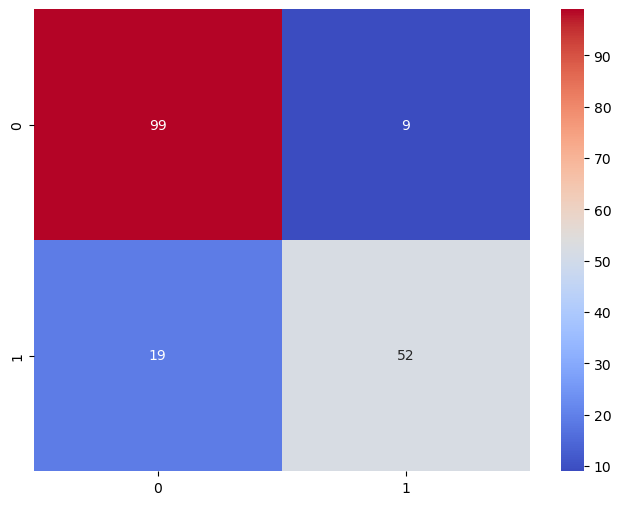

In [32]:
# confusion matrix
plt.figure(figsize=(8,6))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g", cmap='coolwarm')
plt.show()

<Figure size 800x600 with 0 Axes>

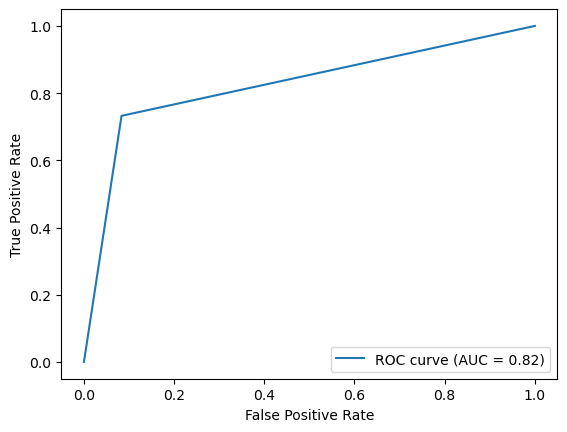

In [33]:
# ROC curve
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [34]:
# model fitting
model = CatBoostClassifier(verbose=False, random_state=18)
model.fit(X,y)

In [35]:
# evaluation
"Cross-validation roc_auc score :",cross_val_score(model, X, y, cv=5, scoring='roc_auc').mean()


('Cross-validation roc_auc score :', 0.8751749326484773)

In [36]:
# evaluation
"Cross-validation accuracy score :",cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

('Cross-validation accuracy score :', 0.822635113928818)

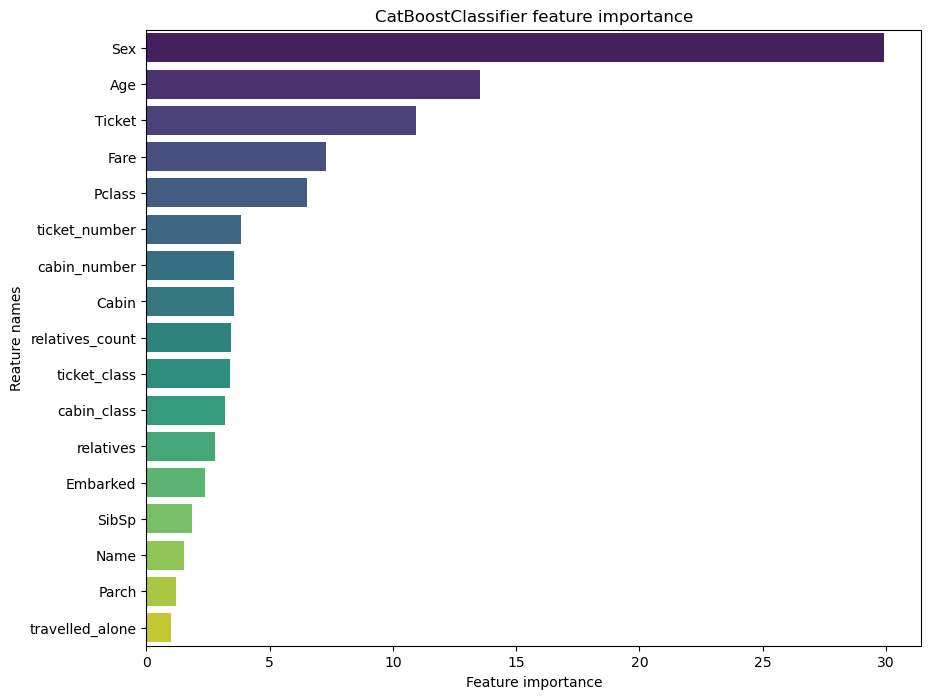

In [37]:
# Feature importance
plt.figure(figsize=(10,8))
fs = pd.Series(model.get_feature_importance(), index=X.columns).sort_values(ascending=False)
sns.barplot(x=fs.values, y=fs.index, palette='viridis')
plt.title('CatBoostClassifier feature importance')
plt.xlabel('Feature importance')
plt.ylabel('Reature names')
plt.show()

## **Submission**

In [39]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv', index_col=0)
submission.Survived = model.predict(test)
submission.to_csv("submission.csv")
pd.read_csv("submission.csv", index_col=0)

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
